In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

G = nx.read_graphml("data/interim/networks/114_HSBU.graphml")

In [18]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
print("Node Attributes Summary:")
print(nodes_df.head())

node_summary = nodes_df.describe(include='all')
print("Node Attributes Summary Statistics:")
print(node_summary)

edges_data = list(G.edges(data=True))
edges_df = pd.DataFrame([{'source': u, 'target': v, **attr} for u, v, attr in edges_data])
print("Edge Attributes Summary:")
print(edges_df.head())

edge_summary = edges_df.describe(include='all')
print("Edge Attributes Summary Statistics:")
print(edge_summary)


Node Attributes Summary:
              thomas_name  govtrack powercmt security         year minority  \
400626.0       Price, Tom  400626.0      1.0      0.0  2015(114th)      0.0   
400352.0        Ryan, Tim  400352.0      1.0      0.0  2015(114th)      1.0   
400262.0   McDermott, Jim  400262.0      1.0      0.0  2015(114th)      1.0   
412295.0  McClintock, Tom  412295.0      0.0      0.0  2015(114th)      0.0   
412661.0  Grothman, Glenn  412661.0      0.0      0.0  2015(114th)      0.0   

         unified minuni        partyloyalty votepct100 votepct_sq100  \
400626.0     0.0    0.0  0.9821052631578948       0.66         43.56   
400352.0     0.0    0.0   0.964248159831756       0.69         47.61   
400262.0     0.0    0.0    0.98840885142255       0.81         65.61   
412295.0     0.0    0.0   0.965412004069176        0.6          36.0   
412661.0     0.0    0.0  0.9681397738951696       0.57         32.49   

                seniority_rs     seniority_sq_rs       abs_dwnom1_r

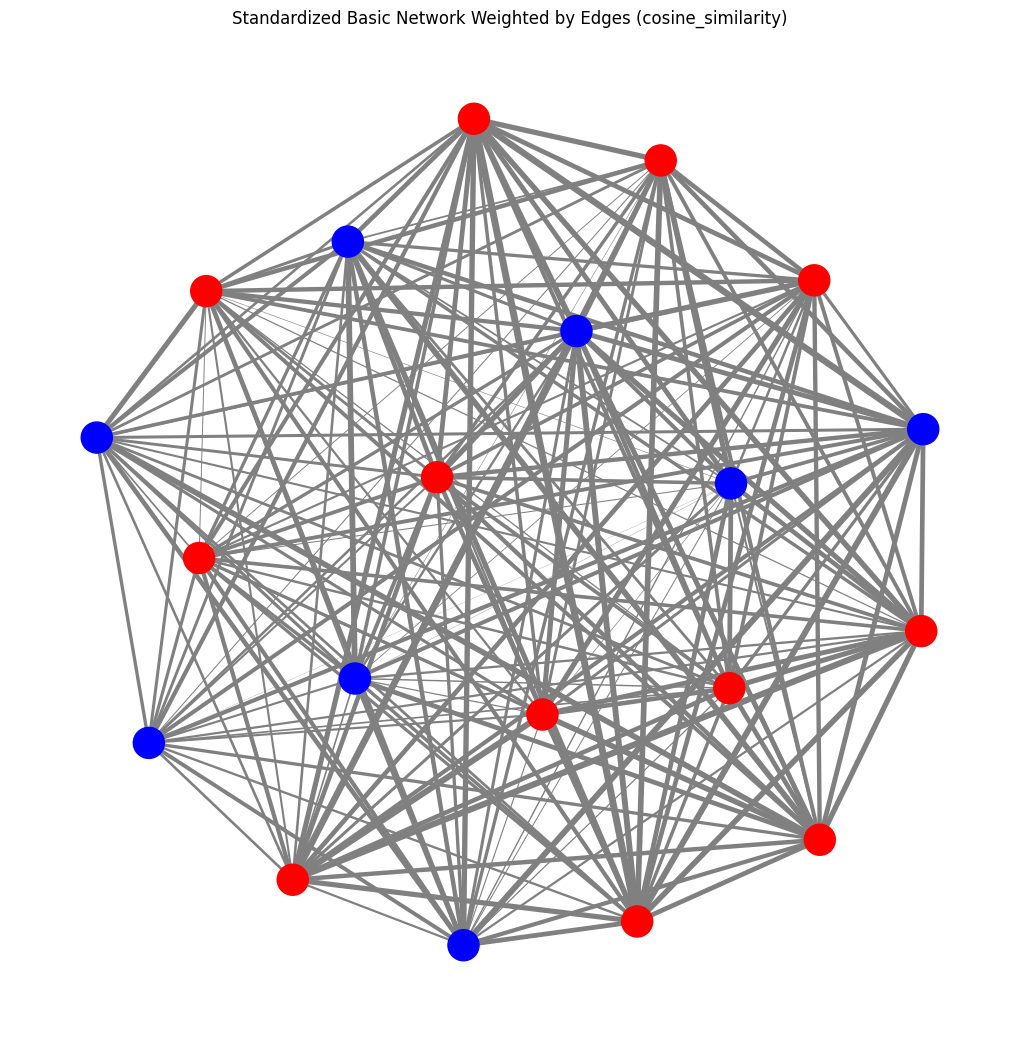

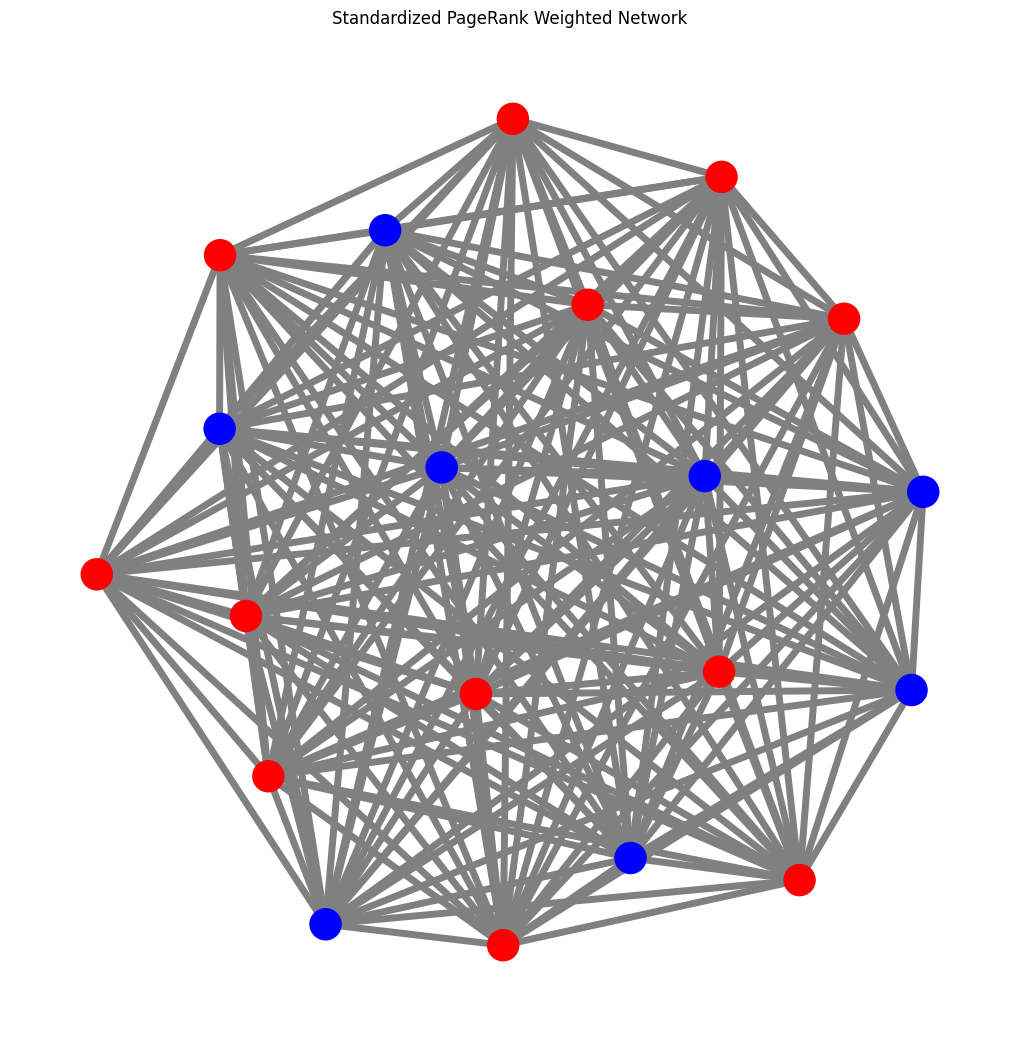

In [20]:
node_colors = ['blue' if int(float(G.nodes[node].get("dem"))) == 1 else 'red' for node in G.nodes()]

# Extract edge weights (assuming the weight attribute is cosine_similarity)
edge_weights = [G[u][v].get('cosine_similarity', 1.0) for u, v in G.edges()]

# Standardize edge weights for cosine similarity
max_weight = max(edge_weights)
min_weight = min(edge_weights)
if max_weight != min_weight:
    standardized_edge_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in edge_weights]
else:
    standardized_edge_weights = [1.0 for _ in edge_weights]  # Assign default value if all weights are the same

# Standardize PageRank values
pagerank = nx.pagerank(G)
pagerank_values = list(pagerank.values())
max_pagerank = max(pagerank_values)
min_pagerank = min(pagerank_values)
if max_pagerank != min_pagerank:
    standardized_pagerank_weights = [(weight - min_pagerank) / (max_pagerank - min_pagerank) for weight in pagerank_values]
else:
    standardized_pagerank_weights = [1.0 for _ in pagerank_values]  # Assign default value if all weights are the same

# Plot the standardized basic network weighted by edges
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    with_labels=False,  # No labels
    node_size=500,
    node_color=node_colors,
    edge_color='gray',
    width=[w * 5 for w in standardized_edge_weights]  # Scale weights for better visibility
)
plt.title("Standardized Basic Network Weighted by Edges (cosine_similarity)")
plt.savefig('standardized_basic_network_weighted_edges.png')
plt.show()

# Plot the standardized PageRank weighted network
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    with_labels=False,  # No labels
    node_size=500,
    node_color=node_colors,
    edge_color='gray',
    width=[w * 5 for w in standardized_pagerank_weights]  # Scale weights for better visibility
)
plt.title("Standardized PageRank Weighted Network")
plt.savefig('standardized_pagerank_weighted_network.png')
plt.show()
